
Initialized sequence with 41 registries.

Test performed on 41 registries.
Discarded 0 records < 1 after preparation.

The entries with the significant positive deviations are:

             Expected     Found   Z_score
First_1_Dig                              
5            0.079181  0.170732  1.881784


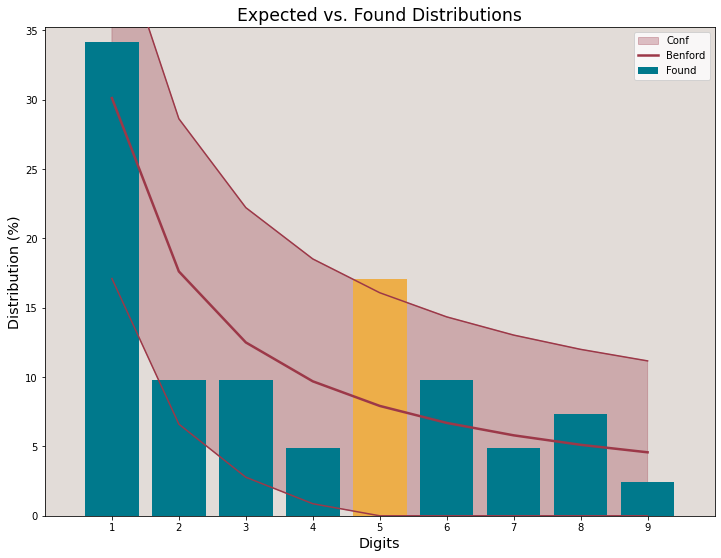

,Counts,Found,Expected,Z_score
First_1_Dig,,,,
5,7,0.170732,0.079181,1.881784
2,4,0.097561,0.176091,1.115135
4,2,0.048780,0.096910,0.777772
6,4,0.097561,0.066947,0.471891
1,14,0.341463,0.301030,0.394182
3,4,0.097561,0.124939,0.294016
8,3,0.073171,0.051153,0.285501
9,1,0.024390,0.045757,0.281062
7,2,0.048780,0.057992,-0.081739


In [10]:
import tiktoken
import lorem
import pandas as pd
import benford as bf

t="If we are not free, no one will respect us. My second vision for India's development. For fifty years we have been a developing nation. It is time we see ourselves as a developed nation."
enc = tiktoken.encoding_for_model("gpt-4")
loremcode = enc.encode(t)
loremcodes = pd.Series(loremcode).astype('float64')
bf.first_digits(loremcodes, digs=1,confidence=90)


Initialized sequence with 41 registries.

Test performed on 41 registries.
Discarded 0 records < 1 after preparation.

The entries with the significant positive deviations are:

             Expected     Found   Z_score
First_1_Dig                              
5            0.079181  0.170732  1.881784


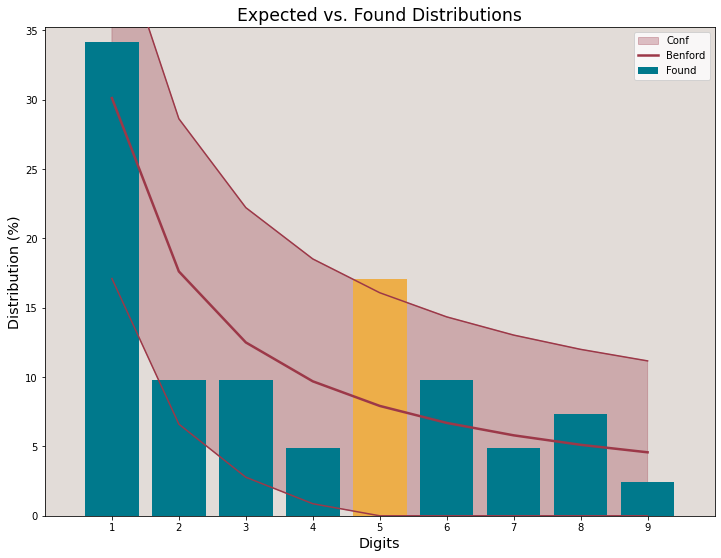


Initialized sequence with 37 registries.

Test performed on 37 registries.
Discarded 0 records < 1 after preparation.

The entries with the significant positive deviations are:

Empty DataFrame
Columns: [Expected, Found, Z_score]
Index: []


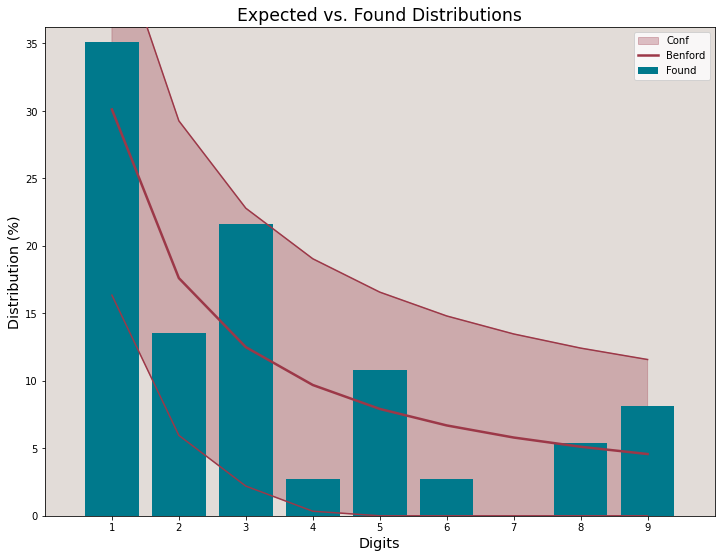

TypeError: '>' not supported between instances of 'str' and 'float'

In [11]:
import tiktoken
import pandas as pd
import benford as bf

# Function to encode text and calculate first digits frequencies
def calculate_first_digits_frequency(text):
    enc = tiktoken.encoding_for_model("gpt-4")
    text_encoding = enc.encode(text)
    text_encodings_series = pd.Series(text_encoding).astype('float64')
    first_digit_freq = bf.first_digits(text_encodings_series, digs=1, confidence=90)
    return first_digit_freq

# Sample AI-generated text
ai_generated_text = "If we are not free, no one will respect us. My second vision for India's development. For fifty years we have been a developing nation. It is time we see ourselves as a developed nation."

# Sample human-generated text
human_generated_text = "In the bustling city, life moves at its own pace. People rushing, cars honking, and a myriad of colors painting the streets. The vibrant energy of the city is contagious."

# Calculate first digits frequencies for both types of text
ai_generated_freq = calculate_first_digits_frequency(ai_generated_text)
human_generated_freq = calculate_first_digits_frequency(human_generated_text)

# Compare the first digits frequencies using a threshold
threshold = 0.1  # Adjust the threshold as needed

if max(ai_generated_freq - human_generated_freq) > threshold:
    print("The text is likely AI-generated.")
elif max(human_generated_freq - ai_generated_freq) > threshold:
    print("The text is likely human-generated.")
else:
    print("Unable to differentiate between AI-generated and human-generated text.")



Initialized sequence with 101 registries.

Test performed on 101 registries.
Discarded 0 records < 1 after preparation.

The entries with the significant positive deviations are:

             Expected     Found   Z_score
First_1_Dig                              
3            0.124939  0.227723  2.973587
4            0.096910  0.168317  2.257601
1            0.301030  0.396040  1.973123


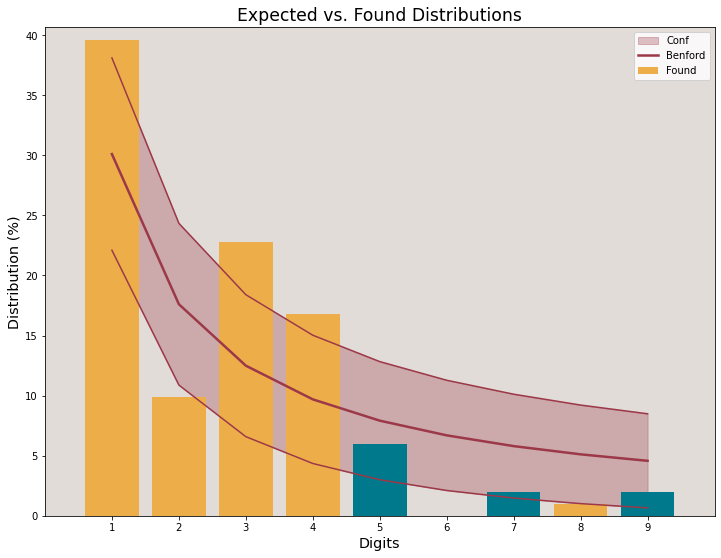

c:\Users\Harsh Shetye\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_stats_py.py:6744: RuntimeWarning: divide by zero encountered in double_scalars
  relative_diff = (np.abs(f_obs_sum - f_exp_sum) /


ValueError: For each axis slice, the sum of the observed frequencies must agree with the sum of the expected frequencies to a relative tolerance of 1e-08, but the percent differences are:
inf

In [13]:
import math
from scipy.stats import chisquare
import benford as bf
import tiktoken
import pandas as pd

def benford_conformity(observed):
  expected = [math.log10(1 + 1/i) for i in range(1, 10)]
  return chisquare(observed, expected)[0]

text = input("Enter some text: ")

enc = tiktoken.encoding_for_model("gpt-4")
encoded = enc.encode(text)
series = pd.Series(encoded).astype('float64')

benford = bf.first_digits(series, digs=1, confidence=90)

observed = [benford.get(i, 0) for i in range(1, 10)] 
conformity = benford_conformity(observed)

if conformity > 0.1:
  print("The text is likely human-written")
else:
  print("The text appears to be AI/GPT-generated")

In [18]:
import string
import numpy as np
import pandas as pd
from scipy.stats import chisquare

def preprocess_text(text):
    # Remove punctuation and convert to lowercase
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = text.lower()
    return text

def get_leading_digits(text):
    # Get the leading digits from the numerical content in the text
    digits = [int(char) for char in text if char.isdigit()]
    if digits:
        return digits[0]
    else:
        return None

def calculate_benford_distribution(data):
    # Calculate the Benford's Law distribution for the data
    benford_dist = [np.log10(1 + 1/d) for d in range(1, 10)]
    observed_dist = [data.count(d) / len(data) for d in range(1, 10)]
    return benford_dist, observed_dist

def classify_text(text, human_dist, ai_dist):
    text = preprocess_text(text)
    leading_digit = get_leading_digits(text)
    
    if leading_digit is not None:
        human_chi2, _ = chisquare(human_dist, f_exp=[human_dist[leading_digit-1]*len(text)])
        ai_chi2, _ = chisquare(ai_dist, f_exp=[ai_dist[leading_digit-1]*len(text)])
        
        if human_chi2 < ai_chi2:
            return "Human-Generated"
        else:
            return "GPT/AI-Generated"
    else:
        return "Unknown"

# Example data for demonstration purposes
human_texts = ["Lord, make me a channel of your peace, that where there is hatred, I may bring love; that where there is wrong, I may bring the spirit of forgiveness; that where there is discord, I may bring harmony; that where there is error, I may bring truth; that where there is doubt, I may bring faith; that where there is despair, I may bring hope; that where there are shadows, I may bring light; that where there is sadness, I may bring joy."]

ai_texts = ["Oh Lord, transform me into an instrument of your peace. Allow me to spread love in the face of hatred, embrace forgiveness in the presence of wrongs, and foster harmony amid discord. Grant me the ability to share truth in times of error, instill faith where doubt resides, and offer hope in moments of despair. Let me bring light to shadows and sow joy in the midst of sadness."
]


# Preprocess the data
human_texts = [preprocess_text(text) for text in human_texts]
ai_texts = [preprocess_text(text) for text in ai_texts]

# Calculate the distributions
human_benford, human_observed = calculate_benford_distribution(human_texts)
ai_benford, ai_observed = calculate_benford_distribution(ai_texts)

# Test the classification on new input
new_text = "Before I read this statement I would like to state that I entirely endorse the learned Advocate-General's remarks in connection with my humble self. I think that he has made, because it is very true and I have no desire whatsoever to conceal from this court the fact that to preach disaffection towards the existing system of Government has become almost a passion with me, and the Advocate-General is entirely in the right when he says that my preaching of disaffection did not commence with my connection with Young India but that it commenced much earlier, and in the statement that I am about to read, it will be my painful duty to admit before this court that it commenced much earlier than the period stated by the Advocate-General. It is a painful duty with me but I have to discharge that duty knowing the responsibility that rests upon my shoulders, and I wish to endorse all the blame that the learned Advocate-General has thrown on my shoulders in connection with the Bombay occurrences, Madras occurrences and the Chauri Chuara occurrences. Thinking over these things deeply and sleeping over them night after night, it is impossible for me to dissociate myself from the diabolical crimes of Chauri Chaura or the mad outrages of Bombay. He is quite right when he says, that as a man of responsibility, a man having received a fair share of education, having had a fair share of experience of this world, I should have known the consequences of every one of my acts. I know them. I knew that I was playing with fire. I ran the risk and if I was set free I would still do the same. I have felt it this morning that I would have failed in my duty, if I did not say what I said here just now."
classification = classify_text(new_text, human_observed, ai_observed)
print(f"Classification: {classification}")


Classification: Unknown


In [21]:
import string

def preprocess_text(text):
    # Remove punctuation and convert to lowercase
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = text.lower()
    return text

def calculate_average_word_length(text):
    words = text.split()
    word_lengths = [len(word) for word in words]
    return sum(word_lengths) / len(words) if len(words) > 0 else 0

def classify_text(text, threshold=5.0):
    text = preprocess_text(text)
    avg_word_length = calculate_average_word_length(text)

    if avg_word_length >= threshold:
        return "Human-Generated"
    else:
        return "AI-Generated"

# Test the classification on new input
new_text = "Lord, make me a channel of your peace, that where there is hatred, I may bring love; that where there is wrong, I may bring the spirit of forgiveness; that where there is discord, I may bring harmony; that where there is error, I may bring truth; that where there is doubt, I may bring faith; that where there is despair, I may bring hope; that where there are shadows, I may bring light; that where there is sadness, I may bring joy."
classification = classify_text(new_text)
print(f"Classification: {classification}")


Classification: AI-Generated


In [23]:
import torch
from transformers import BertTokenizer, BertForSequenceClassification

def classify_text(text):
    # Load pre-trained BERT model and tokenizer
    tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
    model = BertForSequenceClassification.from_pretrained('bert-base-uncased')

    # Tokenize the input text and prepare input tensor
    inputs = tokenizer(text, padding=True, truncation=True, return_tensors="pt")
    outputs = model(**inputs)

    # Get the predicted label (0 for AI-Generated, 1 for Human-Generated)
    predicted_label = torch.argmax(outputs.logits, dim=1).item()

    if predicted_label == 0:
        return "AI-Generated"
    else:
        return "Human-Generated"

# Test the classification on new input
new_text = "Lord, make me a channel of your peace, that where there is hatred, I may bring love; that where there is wrong, I may bring the spirit of forgiveness; that where there is discord, I may bring harmony; that where there is error, I may bring truth; that where there is doubt, I may bring faith; that where there is despair, I may bring hope; that where there are shadows, I may bring light; that where there is sadness, I may bring joy."
classification = classify_text(new_text)
print(f"Classification: {classification}")


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

Classification: AI-Generated
